In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Aug  6 18:59:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Welcome to Pipelines!

The HuggingFace transformers library provides APIs at two different levels.

The High Level API for using open-source models for typical inference tasks is called "pipelines". It's incredibly easy to use.

You create a pipeline using something like:

`my_pipeline = pipeline("the_task_I_want_to_do")`

Followed by

`result = my_pipeline(my_input)`

And that's it!

See end of this colab for a list of all pipelines.

In [ ]:
!pip install -q transformers datasets diffusers

In [ ]:
# imports

import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [ ]:
# Sentiment Analysis

classifier = pipeline("sentiment-analysis")
result = classifier("I'm not super excited to be on the way to LLM Mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9995755553245544}]


In [ ]:
# Named Entity Recognition

ner = pipeline("ner", grouped_entities=True)
result = ner("Jawaharlal Nehru was the first prime minister of India.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': np.float32(0.9977411), 'word': 'Jawaharlal Nehru', 'start': 0, 'end': 16}, {'entity_group': 'LOC', 'score': np.float32(0.998602), 'word': 'India', 'start': 49, 'end': 54}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
# Question Answering with context

question_answerer = pipeline("question-answering")
result = question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'score': 0.6949763894081116, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}


In [ ]:
# Text Summarisation

summarizer = pipeline("summarization")
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
result = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(result[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


In [ ]:
# Translation

translator = pipeline("translation_en_to_fr")
result = translator("The data scientists were truly amazed by the power and simplicity of the Hugging Face pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Les chercheurs en données ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline Hugging Face.


In [ ]:
# Classification

classifier = pipeline("zero-shot-classification")
result = classifier(
    "HuggingFace's transformers library is amazing!",
    candidate_labels=["technology", "sports", "politics"]
)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'sequence': "HuggingFace's transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9724137783050537, 0.016693083569407463, 0.010893145576119423]}


In [ ]:
# Text Generation

generator = pipeline("text-generation")
result = generator("If there's one thing that I want you to remember about using HuggingFace pipelines, it is")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing that I want you to remember about using HuggingFace pipelines, it is that you should always use a tool that supports plugins. If you're using a plugin, you should always use a tool that supports plugins.

If you've ever used a plugin that allows you to type in your own custom font, you know that Vim can help you out.

When you're writing a plugin, you should always include support for plugins.

You should always include support for plugins.

You should always include support for plugins.

You should always include support for plugins.

What about a plugin that you're not sure about? If you're not sure about the name of the plugin, don't hesitate to ask.

If you're not sure about the name of the plugin, don't hesitate to ask.

If you're not sure about the name of the plugin, don't hesitate to ask.

What if you don't have a plugin that you want to use? If you're not sure about the name of the plugin, don't hesitate to ask. If you've never used a plugin that you're no

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

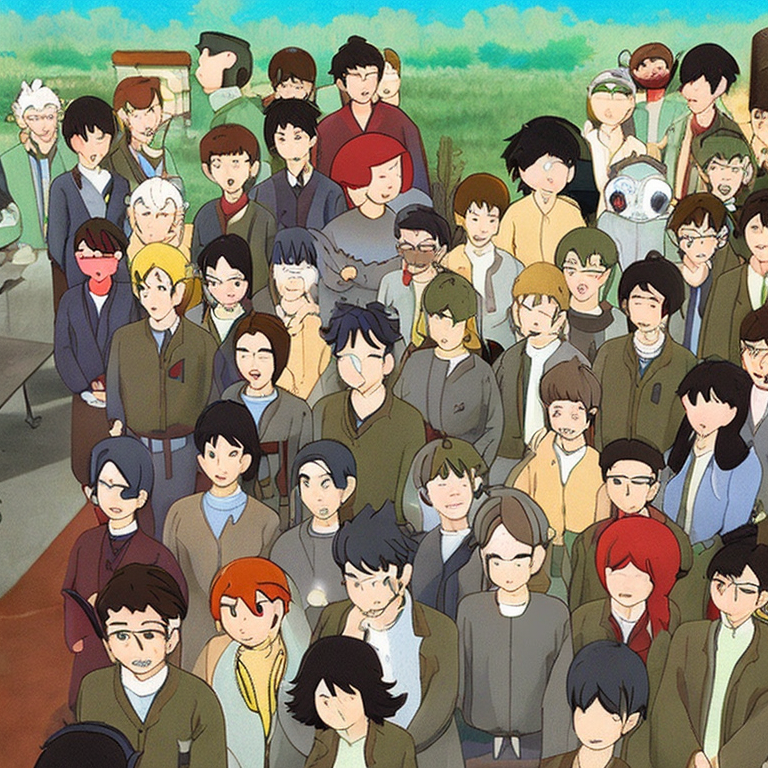

In [ ]:
# Image Generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant='fp16'
).to("cuda")

text = "A class of AI Engineers learning about AI, in GHIBLI Style"
image = image_gen(prompt=text).images[0]
image

In [ ]:
!wget https://huggingface.co/datasets/Matthijs/cmu-arctic-xvectors/resolve/main/cmu-arctic-xvectors.npz


--2025-08-06 17:10:42--  https://huggingface.co/datasets/Matthijs/cmu-arctic-xvectors/resolve/main/cmu-arctic-xvectors.npz
Resolving huggingface.co (huggingface.co)... 13.35.202.121, 13.35.202.34, 13.35.202.40, ...
Connecting to huggingface.co (huggingface.co)|13.35.202.121|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-08-06 17:10:42 ERROR 404: Not Found.



In [ ]:
# Audio Generation

try:
    tts = pipeline("text-to-speech", "facebook/mms-tts-eng")

    text = "Hi, I am Optimus Prime. I am the leader of Autobots. Bow before me!"
    speech = tts(text)

    sf.write("speech_simple.wav", speech["audio"][0], samplerate=speech["sampling_rate"])
    print("Simple TTS audio saved as speech_simple.wav")

except Exception as e:
    print(f"Simple TTS failed: {e}")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

Device set to use cuda:0


Simple TTS audio saved as speech_simple.wav


In [ ]:
try:
    from transformers import AutoProcessor, BarkModel

    processor = AutoProcessor.from_pretrained("suno/bark")
    model = BarkModel.from_pretrained("suno/bark")

    # Bark supports voice presets
    voice_preset = "v2/en_speaker_6"  # Male voice

    text = "Hi, I am Optimus Prime. I am the leader of Autobots. Bow before me!"
    inputs = processor(text, voice_preset=voice_preset, return_tensors="pt")

    with torch.no_grad():
        audio_array = model.generate(**inputs)
    audio_array = audio_array.cpu().numpy().squeeze()

    # Bark uses 24kHz sample rate
    sf.write("speech_bark.wav", audio_array, samplerate=model.generation_config.sample_rate)
    print("Bark audio saved as speech_bark.wav")

except ImportError:
    print("Bark not available, install with: pip install transformers[torch] scipy")

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

speaker_embeddings_path.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

en_speaker_6_semantic_prompt.npy:   0%|          | 0.00/2.60k [00:00<?, ?B/s]

en_speaker_6_coarse_prompt.npy:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

en_speaker_6_fine_prompt.npy:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
